# Clusterização

In [1]:
%pylab inline

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from utils import zscore, gen_metrics, plot_results, plot_views_clusters
import pandas as pd
import seaborn as sns

style.use('material_darker')
figsize(10, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("../DS Challenge/clusterization.csv").dropna()
train = zscore(train)

## Visualizando os dados

In [3]:
train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,-3.174296e-15,3.313313e-16,-1.845827e-15,-3.174296e-15,-1.211936e-15,-4.439144e-15,-6.526291e-15,-1.710262e-16,-1.862806e-16,-1.806074e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.530998e+00,-4.154593e+00,-3.787538e+00,-4.530998e+00,-3.885182e+00,-5.102502e+00,-4.375418e+00,-4.248821e+00,-4.303357e+00,-4.822595e+00
25%,-6.700263e-01,-6.832319e-01,-6.890732e-01,-6.700263e-01,-6.812246e-01,-6.350780e-01,-6.362459e-01,-6.090709e-01,-6.658568e-01,-6.580479e-01
50%,1.039016e-02,-8.263091e-02,-1.652063e-02,1.039016e-02,-3.564214e-02,-2.480710e-03,2.205751e-02,5.632800e-02,7.254748e-04,1.252711e-02
75%,6.865000e-01,6.220343e-01,6.642394e-01,6.865000e-01,6.495655e-01,6.436325e-01,6.562879e-01,6.752840e-01,6.695168e-01,6.640915e-01
max,3.695544e+00,4.280592e+00,4.076641e+00,3.695544e+00,4.355511e+00,4.392245e+00,3.835503e+00,4.213024e+00,4.596379e+00,3.953902e+00


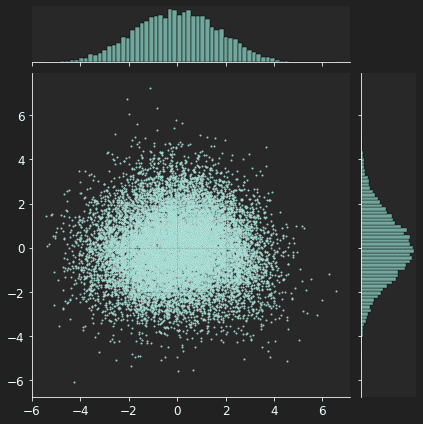

In [4]:
pca = PCA(n_components=2)
trans_data = pca.fit_transform(train)
sns.jointplot(x=trans_data[:,0], y=trans_data[:, 1], s=3)

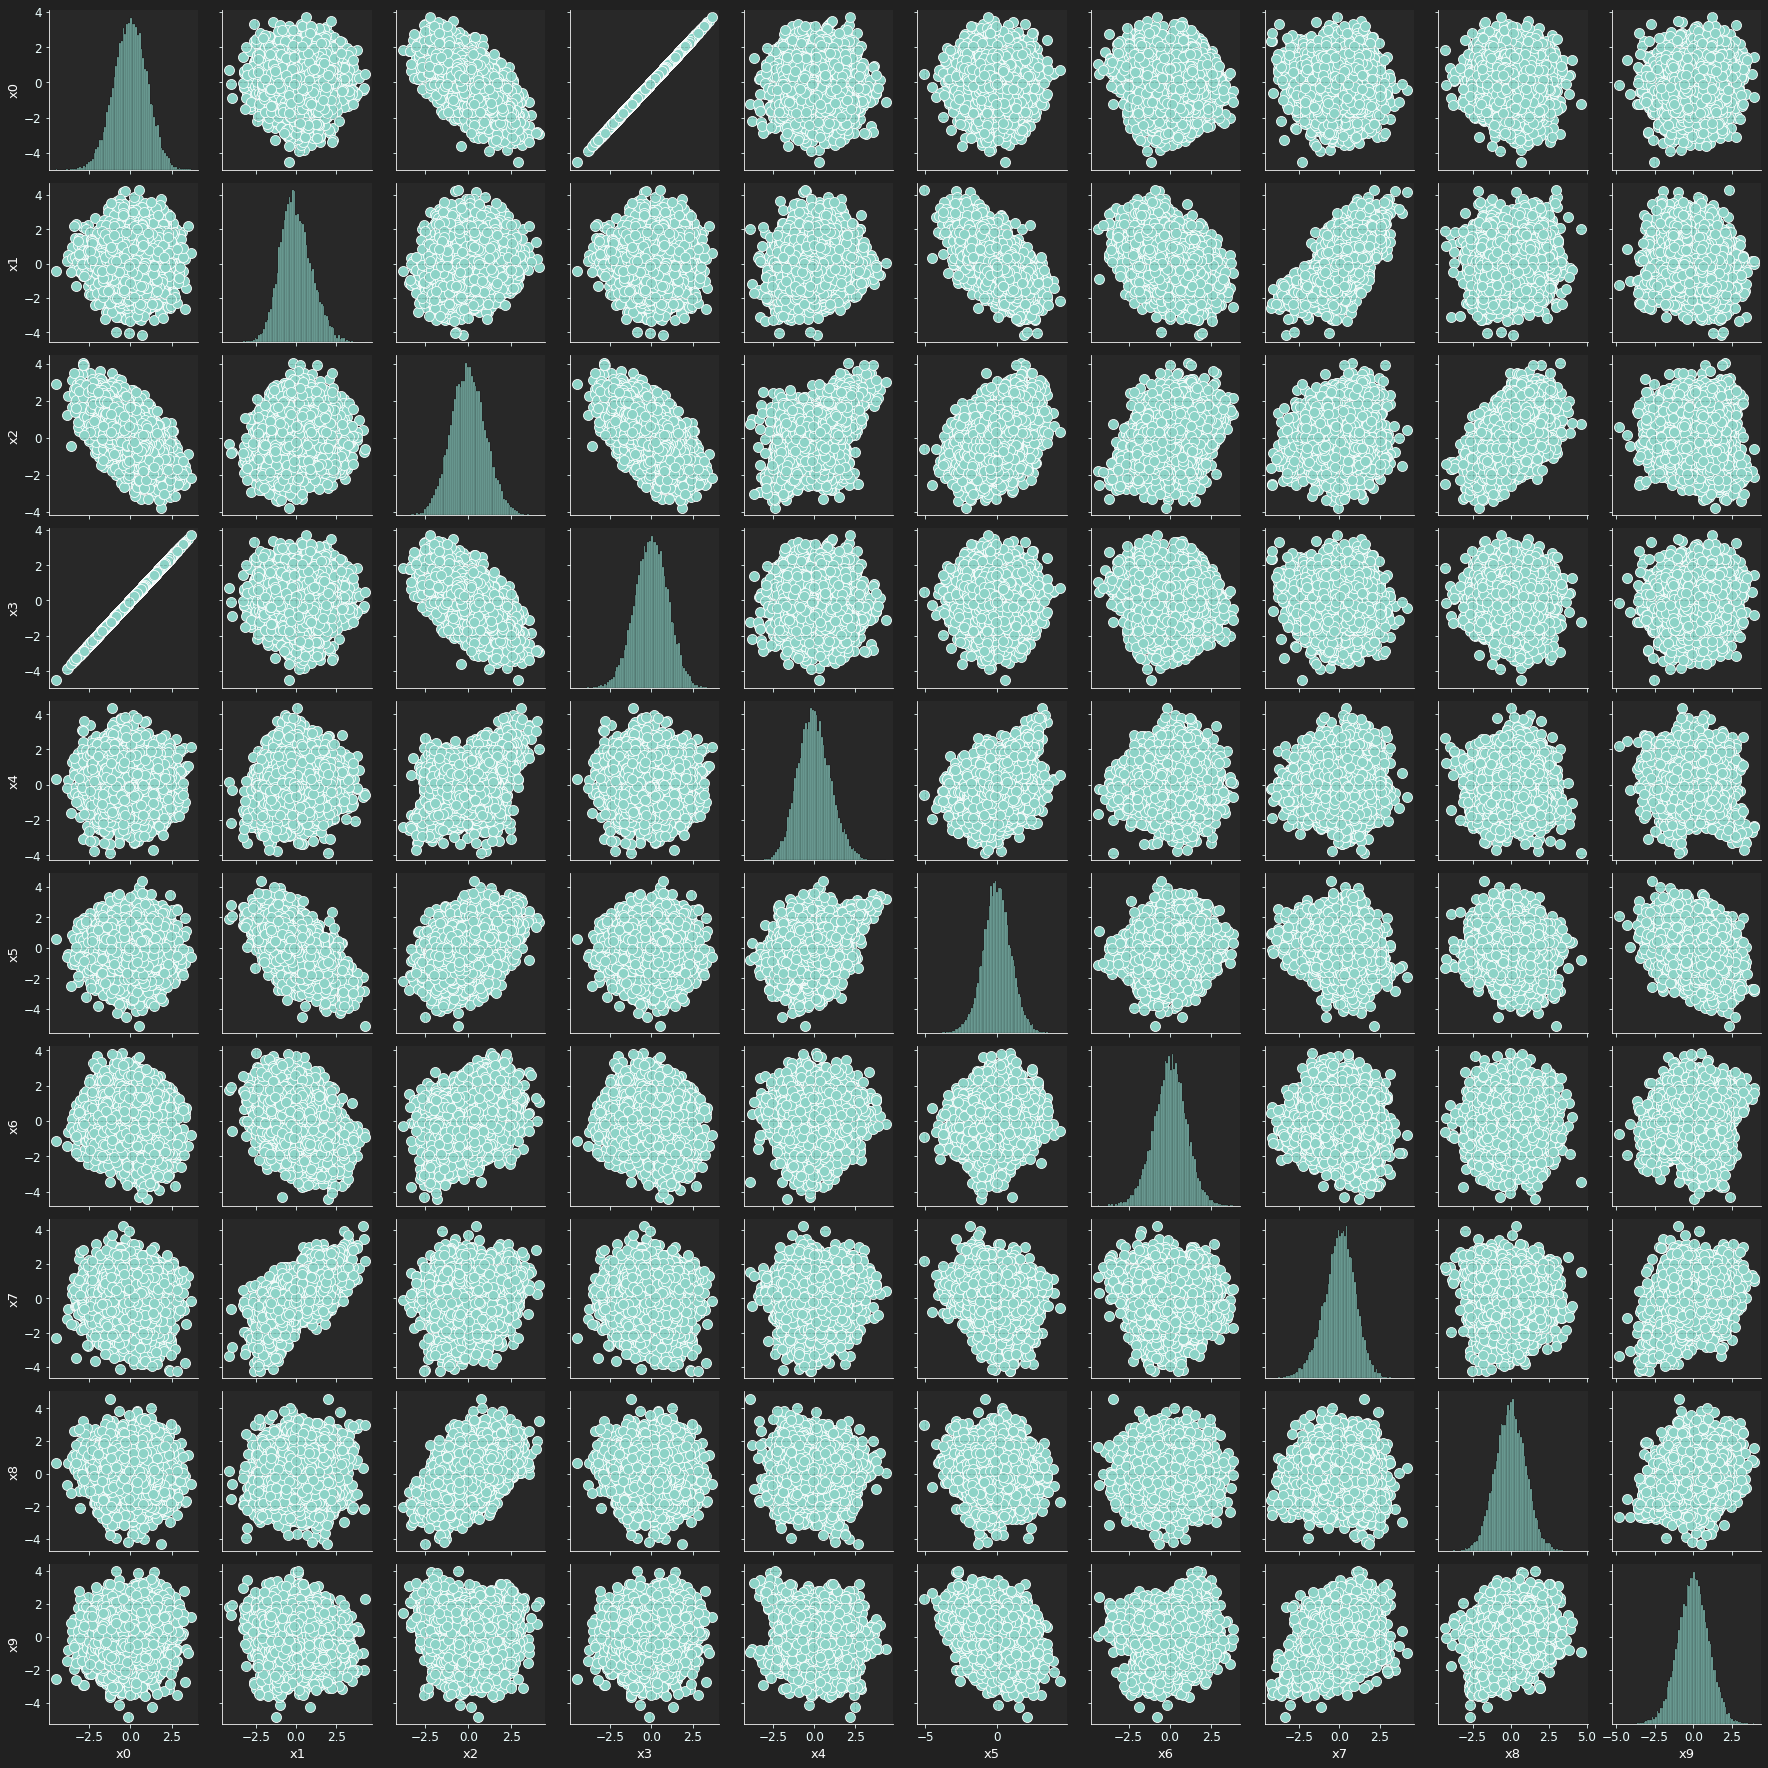

In [5]:
sns.pairplot(train)

<AxesSubplot:>

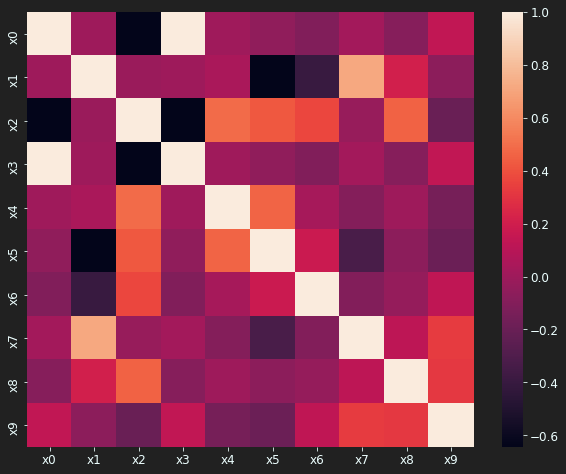

In [6]:
sns.heatmap(train.corr())

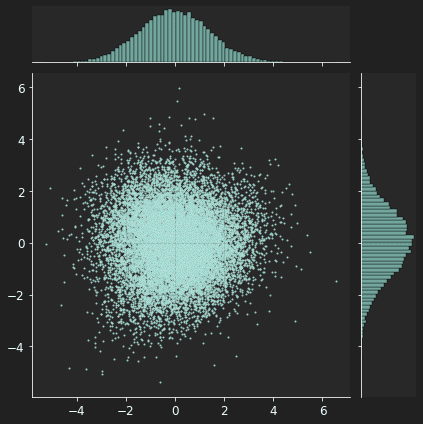

In [7]:
pca = PCA(n_components=2)
trans_data = pca.fit_transform(train[["x0", "x1", "x3", "x7"]])
sns.jointplot(x=trans_data[:,0], y=trans_data[:, 1], s=3)

Esses dados mostram que a distribuição do dataset é quase uma distribuição normal que depois foi randomizada (com excessão da feature x3, que em relação a x0 é realmente pontos ao longo de uma linha), tal distribuição significa que possivelmente o algoritmo de clusterização não terá um bom desempenho e isso mesmo depois de isolar as features melhor correlacionadas.

Talvez um resultado, não necessariamente bom, mas aceitável, seja encontrado com as features selecionadas devido a estarem livres da "poluição" causada pelas features com baixa correlação.

Neste ponto estou pensando na importância que algumas métricas dão à densidade e distância entre clusters, notadamente:

* Silhouette: a grande densidade dos dados tende a fazer com que este índice tenha pontuação mais alta quanto menor for o número de clusters, isso pode ser especialmente verdadeiro com o dataset completo, com todas as features.
* Calinski-Harabasz: Não temos clusters bem separados nesse caso, embora os dados se mostrem bastante densos. A questão da separação dos clusters pode ser mitigada considerando a qualidade das features selecionadas

## Treinamento e visualização das métricas

In [8]:
n_clusters = list(range(2, 21))
train_sel = train[["x0", "x1", "x3", "x7"]]
results_all = gen_metrics(train, n_clusters)
results_sel = gen_metrics(train_sel, n_clusters)

100%|██████████| 19/19 [00:59<00:00,  3.12s/it]


In [9]:
data_metrics_all = pd.DataFrame(results_all, index=n_clusters)
data_metrics_sel = pd.DataFrame(results_sel, index=n_clusters)

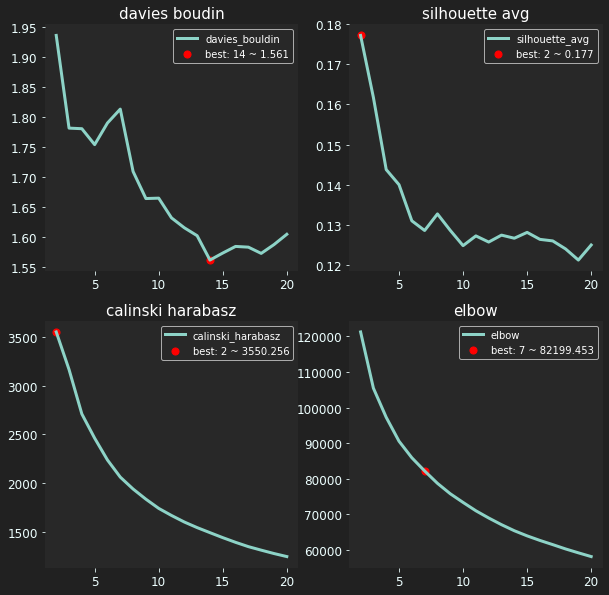

In [10]:
plot_results(data_metrics_all)

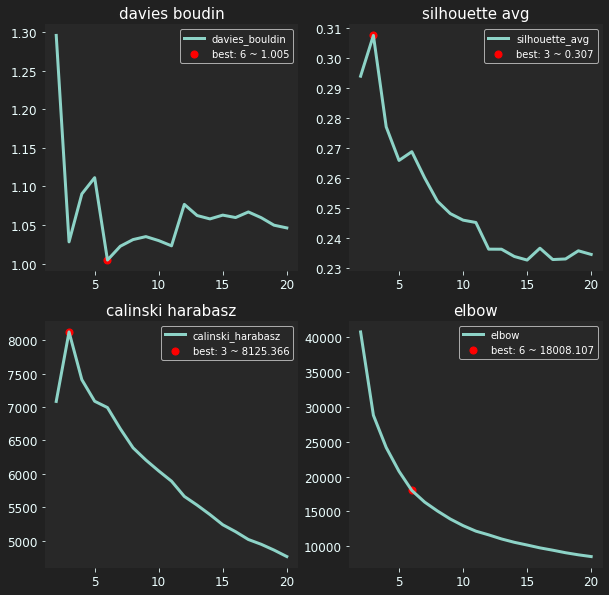

In [11]:
plot_results(data_metrics_sel)

## Visualizando resultados:

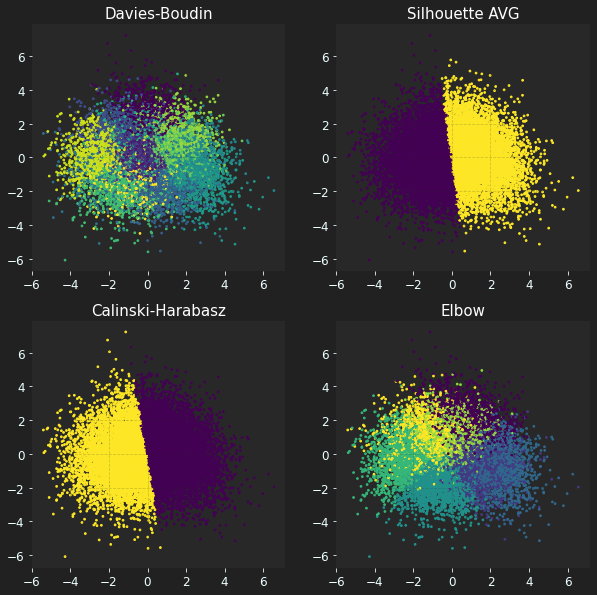

In [15]:
fig, ((ax0, ax1), (ax2, ax3)) = subplots(2, 2, figsize=(10, 10))

plot_views_clusters(train, 14, "Davies-Boudin", ax0)
plot_views_clusters(train, 2, "Silhouette AVG", ax1)
plot_views_clusters(train, 2, "Calinski-Harabasz", ax2)
plot_views_clusters(train, 7, "Elbow", ax3)

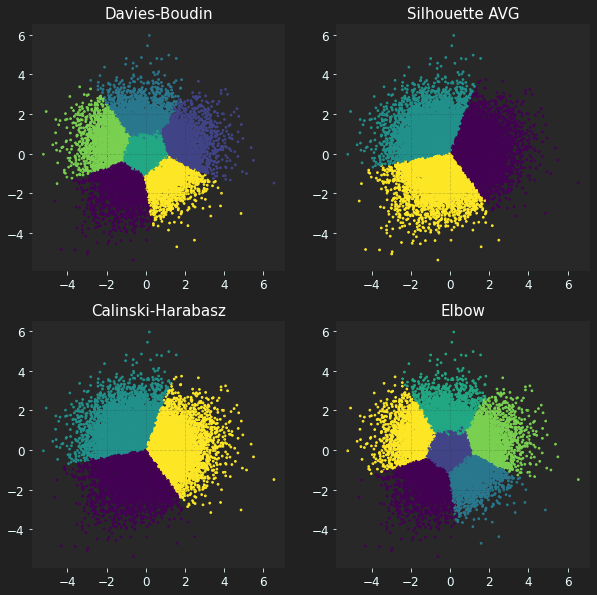

In [14]:
fig, ((ax0, ax1), (ax2, ax3)) = subplots(2, 2, figsize=(10, 10))

plot_views_clusters(train_sel, 6, "Davies-Boudin", ax0)
plot_views_clusters(train_sel, 3, "Silhouette AVG", ax1)
plot_views_clusters(train_sel, 3, "Calinski-Harabasz", ax2)
plot_views_clusters(train_sel, 6, "Elbow", ax3)

## Conclusões

É inegável como a seleção de features baseadas na correlação facilitou a clusterização, 

Considerando as features selecionadas (x0, x1, x3, x7):

sem dúvida superficialmente parece haver maior coesão entre as métricas no dataset com as features melhor correlacionadas, mas ainda assim há um dilema: 3 ou 6 clusters? A métrica Davies-Boudin tem como 2º melhor resultado 3 features, o que a coloca quase como um meio termo entre elbow e as demais, **nesse caso eu escolho 3 clusters**, embora eu já tenha justificado antes possíveis problemas que pudessem afetar os resultados das métricas que tiveram 3 como melhor pontuação, mas o resultado delas se sustenta pela coerência com as outras métricas utilizadas e também pela expressividade dos seus resultados.

Como esperado, o dataset com todas as features apresentou o comportamento imaginado para o coeficiente de silhueta e Calinski-Harabasz, as features com baixa correlação ampliaram a densidade a tal ponto que praticamente inutilizaram essas métricas;